In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [81]:
act_2019 = pd.read_csv("../data/act_2019.csv")
sat_2019 = pd.read_csv("../data/sat_2019.csv")
#major_df = pd.read_csv("../data/sat_2019_by_intended_college_major.csv") NOT SURE IF I AM USING THIS YET


#### Checking the top 5 ACT and SAT 2019 data files

In [4]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [5]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


 #### Checking to see if there is any missing values in the data files and seeing what type of data files the columns are.

In [8]:
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [9]:
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [12]:
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [13]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

##### Lowering all the column names

In [16]:
sat_2018.columns = sat_2018.columns.str.lower()

In [17]:
sat_2019.columns = sat_2019.columns.str.lower()

In [18]:
act_2018.columns = act_2018.columns.str.lower()

In [19]:
act_2019.columns = act_2019.columns.str.lower()

In [20]:
sat_2019.head()

,state,participation rate,ebrw,math,total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [21]:
act_2019.head()

,state,participation,composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


#### Turning collumns into floats and renaming them 

In [32]:
# Removing the percent sign from the participation column
sat_2019['participation rate'] = sat_2019['participation rate'].map(lambda cell: cell.replace('%',''))

act_2019['participation'] = act_2019['participation'].map(lambda cell: cell.replace('%',''))

In [23]:
# Turning the ACT participation column into a float and dividing by 100 to turn the percent into a decimal number
act_2019["participation"] = act_2019.participation.astype(float)

act_2019['participation'] = act_2019['participation'].div(100).round(2)

In [24]:
act_2019["composite"] = act_2019.composite.astype(float)

In [25]:
# Renaming SAT participation column & replacing all the - with 0 so I am able to swith the participation column into a float
sat_2019.rename(columns={'participation rate': 'participation'}, inplace=True)

sat_2019.replace("—", '0', inplace=True)

sat_2019['participation'] = sat_2019['participation'].astype(float, errors = 'raise')

In [26]:
# Dividing by 100 to turn the percentage into a decimal number
sat_2019['participation'] = sat_2019['participation'].div(100).round(2)

In [27]:
# Merging the 2019 ACT and 2019 SAT
sat_act_2019 = pd.merge(
    sat_2019,
    act_2019,
    how="inner",
    on="state",
    suffixes=["_sat", "_act"]
)

In [28]:
#Dropping columns I will not be using.
sat_act_2019.drop('ebrw', axis=1, inplace=True)

sat_act_2019.drop('math', axis=1, inplace=True)

In [29]:
# renaming collums to make them more descriptive
sat_act_2019.rename(columns={
    'total': 'composite_score_sat',
    'composite': 'composite_score_act'
}, inplace=True)


In [55]:
sat_act_2019.head()

,state,participation_sat,composite_score_sat,participation_act,composite_score_act,region
0,Alabama,0.07,1143,1.00,18.9,South
1,Alaska,0.41,1097,0.38,20.1,West
2,Arizona,0.31,1134,0.73,19.0,West
3,Arkansas,0.06,1141,1.00,19.3,South
4,California,0.63,1065,0.23,22.6,West


#### Comparing the participation columns for both SAT and ACT to see if there is some correlation between the two per states

In [33]:
sat_act_2019['participation_sat'].compare(sat_act_2019['participation_act'])

# Here we are able to compare the two participation and see that SAT participation tends to be very low
# where ACT scores are high and vice versa.

,self,other
0,0.07,1.00
1,0.41,0.38
2,0.31,0.73
3,0.06,1.00
4,0.63,0.23
5,1.00,0.27
6,1.00,0.22
7,1.00,0.13
8,0.94,0.32
9,1.00,0.54


In [126]:
sat_act_2019['participation_sat'].describe().T

count    51.000000
mean      0.490588
std       0.387476
min       0.020000
25%       0.055000
50%       0.540000
75%       0.820000
max       1.000000
Name: participation_sat, dtype: float64

In [113]:
sat_act_2019['participation_act'].describe().T

count    51.000000
mean      0.586667
std       0.345159
min       0.060000
25%       0.245000
50%       0.540000
75%       1.000000
max       1.000000
Name: participation_act, dtype: float64

In [35]:
sat_act_2019['composite_score_sat'].mean()

1113.078431372549

In [36]:
sat_act_2019['composite_score_act'].mean()

21.464705882352934

In [37]:
sat_act_2019['participation_sat'].mean()

0.49058823529411755

In [38]:
sat_act_2019['participation_act'].mean()

0.5866666666666667

In [39]:
# SAT scores are scored out of 1,600 points

1113.078431372549/1600

0.6956740196078431

In [40]:
# ACT scores are scored out of 36 points

21.464705882352934/36

0.5962418300653592

#### Noticed that their was a correlation between participation in states so decided to group them into regions to see if their was a relation

In [88]:
sat_act_2019['region'] = ['South', 'West', 'West', 'South', 'West', 'West',
                          'Northeast', 'South', 'South', 'South', 'South', 'West',
                          'West', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'South',
                          'South', 'Northeast', 'South', 'Northeast', 'Midwest', 'Midwest',
                          'South', 'Midwest', 'West', 'Midwest', 'West', 'Northeast',
                          'Northeast', 'West', 'Northeast', 'South', 'Midwest', 'Midwest',
                          'South', 'West', 'Northeast', 'Northeast', 'South', 'South',
                          'South', 'South', 'West', 'Northeast', 'South', 'West', 'South',
                          'Midwest', 'West']

In [89]:
sat_act_2019

,state,participation_sat,composite_score_sat,participation_act,composite_score_act,region
0,Alabama,0.07,1143,1.00,18.9,South
1,Alaska,0.41,1097,0.38,20.1,West
2,Arizona,0.31,1134,0.73,19.0,West
3,Arkansas,0.06,1141,1.00,19.3,South
4,California,0.63,1065,0.23,22.6,West
5,Colorado,1.00,1024,0.27,23.8,West
6,Connecticut,1.00,1046,0.22,25.5,Northeast
7,Delaware,1.00,985,0.13,24.1,South
8,District of Columbia,0.94,975,0.32,23.5,South
9,Florida,1.00,999,0.54,20.1,South


In [90]:
sat_region = sat_act_2019[['participation_sat', 'region']]

In [91]:
act_region = sat_act_2019[['participation_act', 'region']]

In [110]:
sat_region['region'].describe().T

count        51
unique        4
top       South
freq         18
Name: region, dtype: object

In [111]:
act_region['region'].describe().T

count        51
unique        4
top       South
freq         18
Name: region, dtype: object

## Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*obj*|2019 ACT/SAT|States in the United States.| 
|**participation_sat**|*float*|2019 SAT|2019 SAT participation rates through all 50 states in the United States.|
|**participation_act**|*float*|2019 ACT|2019 ACT participation rates through all 50 states in the United States.| 
|**composite_score_sat**|*float*|2019 SAT|2019 SAT scores through all 50 states in the United States.| 
|**composite_score_sat**|*float*|2019 ACT|2019 ACT scores through all the 50 states in the United States.| 
|**region**|*obj*|2019 ACT|States seperated by regions.| 

#### Here we were able to determine that even with the SAT participation being lower over all we are getting a higher overall score, could be used to influence school districts and students to focus more on the SAT.

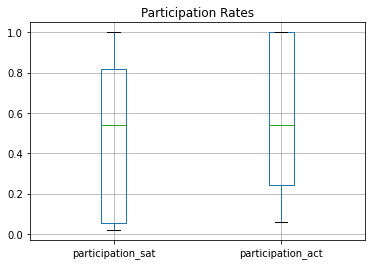

In [94]:
participation_rates = ['participation_sat', 'participation_act']

plt.title('Participation Rates')
sat_act_2019.boxplot(participation_rates);

# overall participation rates between all states are a bit higher for the ACT over SAT

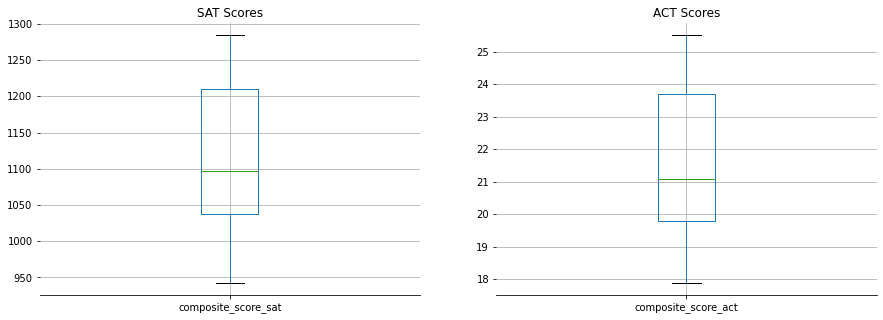

In [95]:
f, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]
ax.set_title('SAT Scores')
sat_act_2019.boxplot('composite_score_sat', ax=ax)

ax=axes[1]
ax.set_title('ACT Scores')
sat_act_2019.boxplot('composite_score_act', ax=ax);

#### These next two charts show the participation rates between states, where SAT is high ACT is low and vice versa

Text(0.5, 1.0, 'SAT Participation Rate per State')

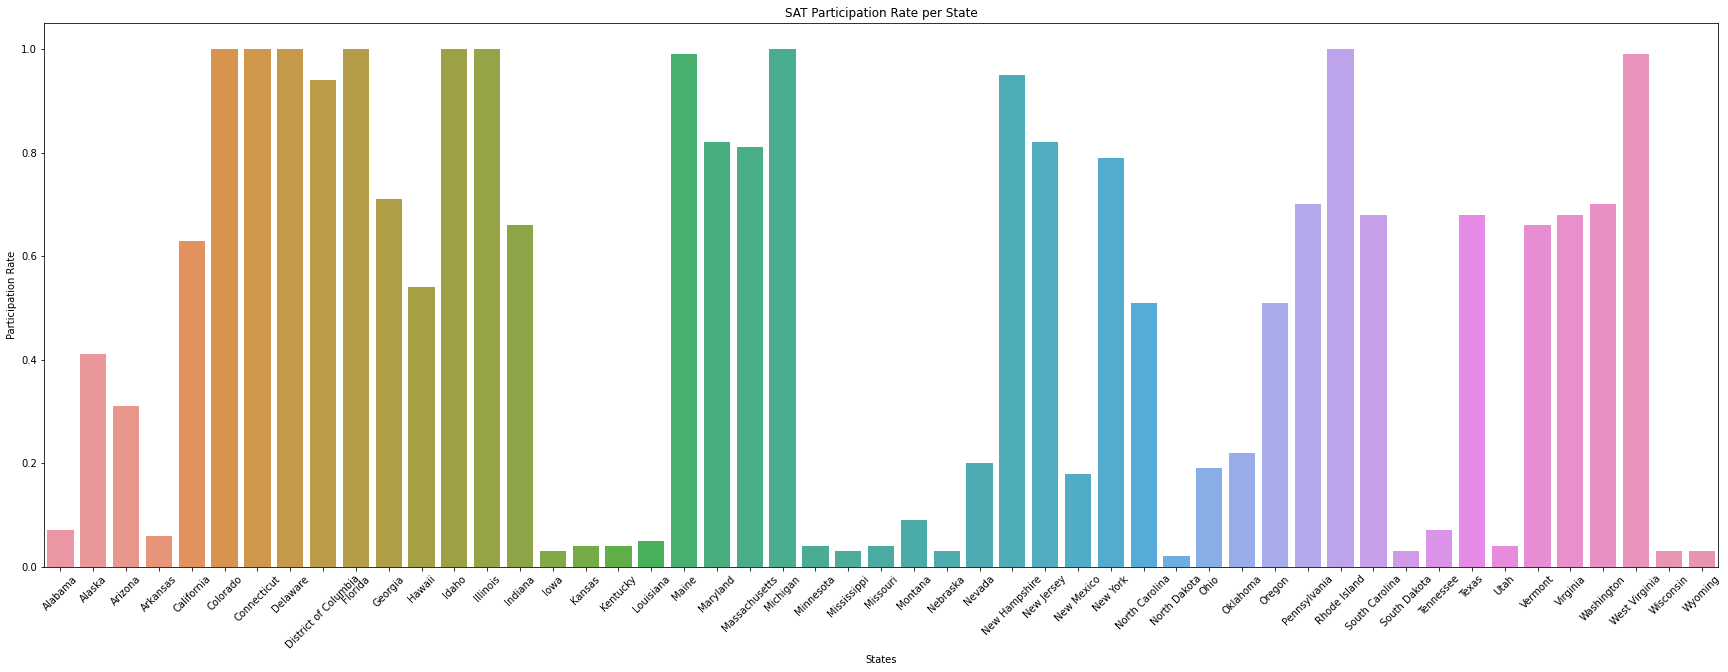

In [96]:
plt.figure(figsize=(30,10))
sns.barplot(x=sat_act_2019['state'], y=sat_act_2019['participation_sat'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Participation Rate')
plt.title('SAT Participation Rate per State')

Text(0.5, 1.0, 'ACT Participation Rate per State')

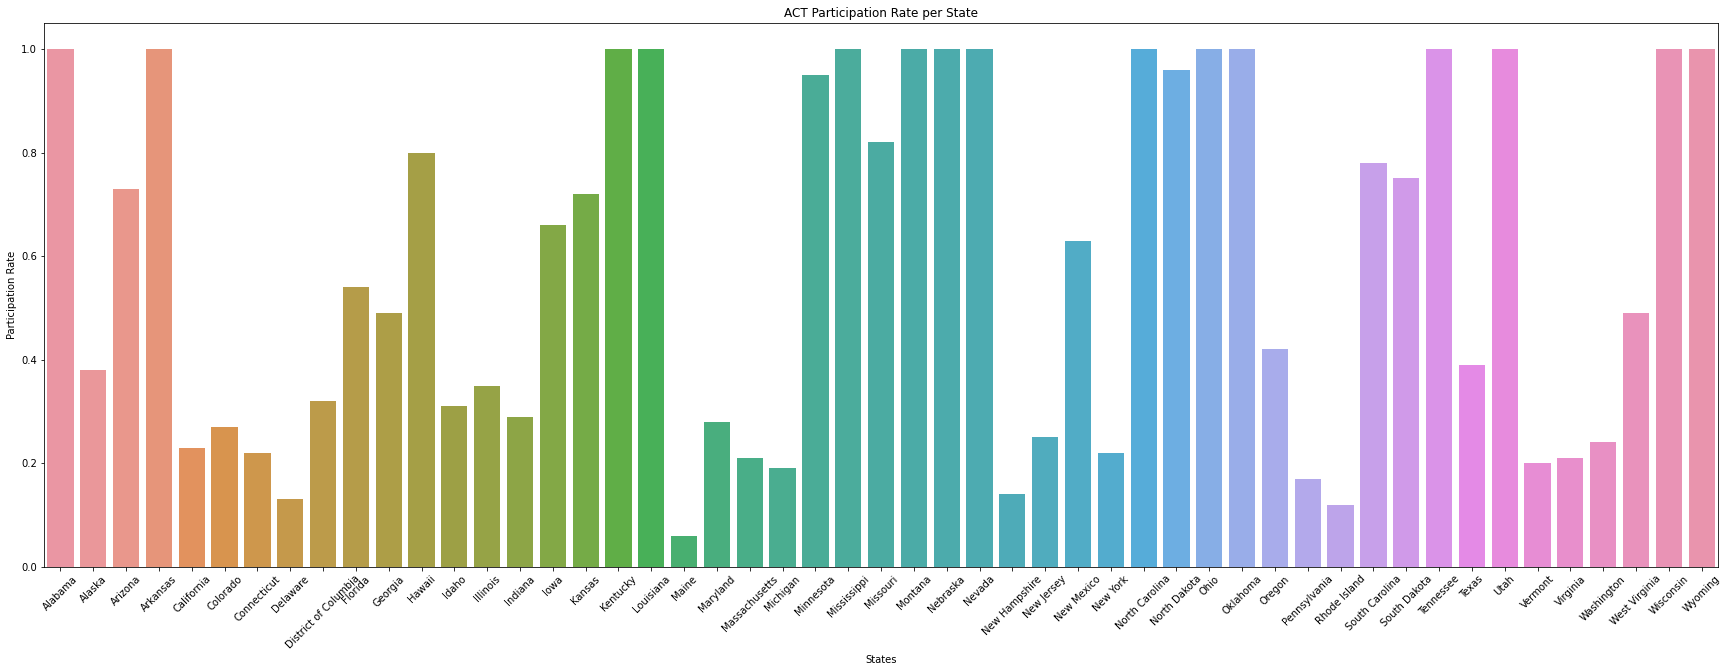

In [97]:
plt.figure(figsize=(30,10))
sns.barplot(x=sat_act_2019['state'], y=sat_act_2019['participation_act'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Participation Rate')
plt.title('ACT Participation Rate per State')

Text(0, 0.5, 'Number of States')

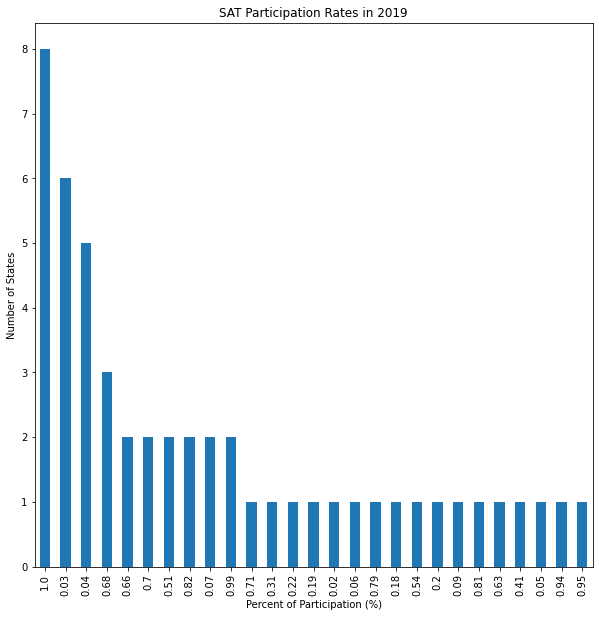

In [98]:
sat_act_2019['participation_sat'].value_counts().plot(kind='bar', figsize=(10,10))
plt.title('SAT Participation Rates in 2019')
plt.xlabel('Percent of Participation (%)')
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

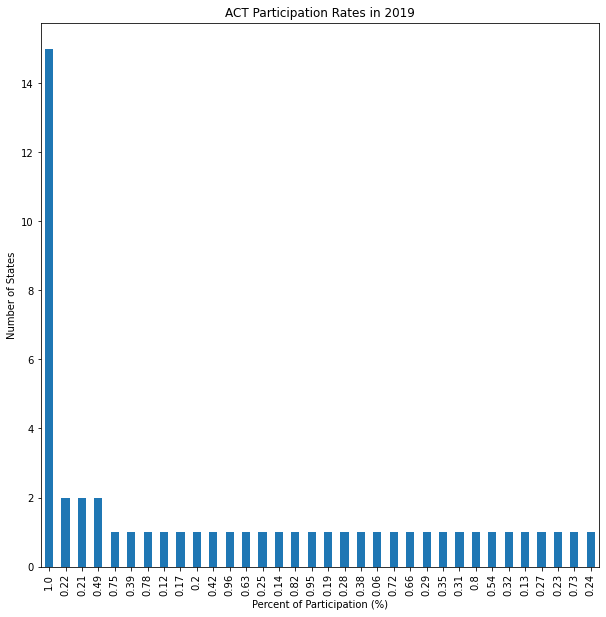

In [99]:
sat_act_2019['participation_act'].value_counts().plot(kind='bar', figsize=(10,10))
plt.title('ACT Participation Rates in 2019')
plt.xlabel('Percent of Participation (%)')
plt.ylabel('Number of States')

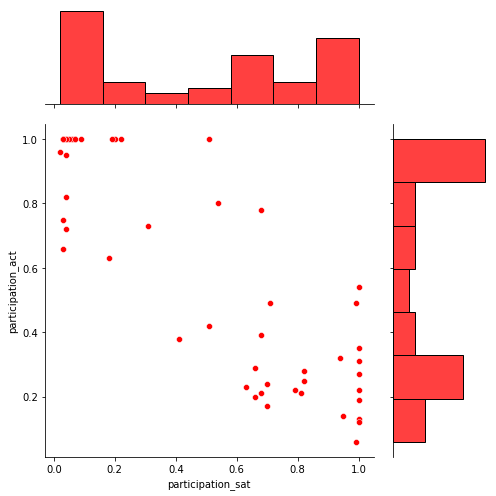

In [100]:
sns.jointplot(x="participation_sat", y="participation_act", data=sat_act_2019,height=7, ratio=3, color="r")

#### When we show a bar plot of the regions theres an obvious correlation between regions, they oppose each other in participation between SAT and ACT

Text(0.5, 1.0, 'SAT Participation Rate per Region')

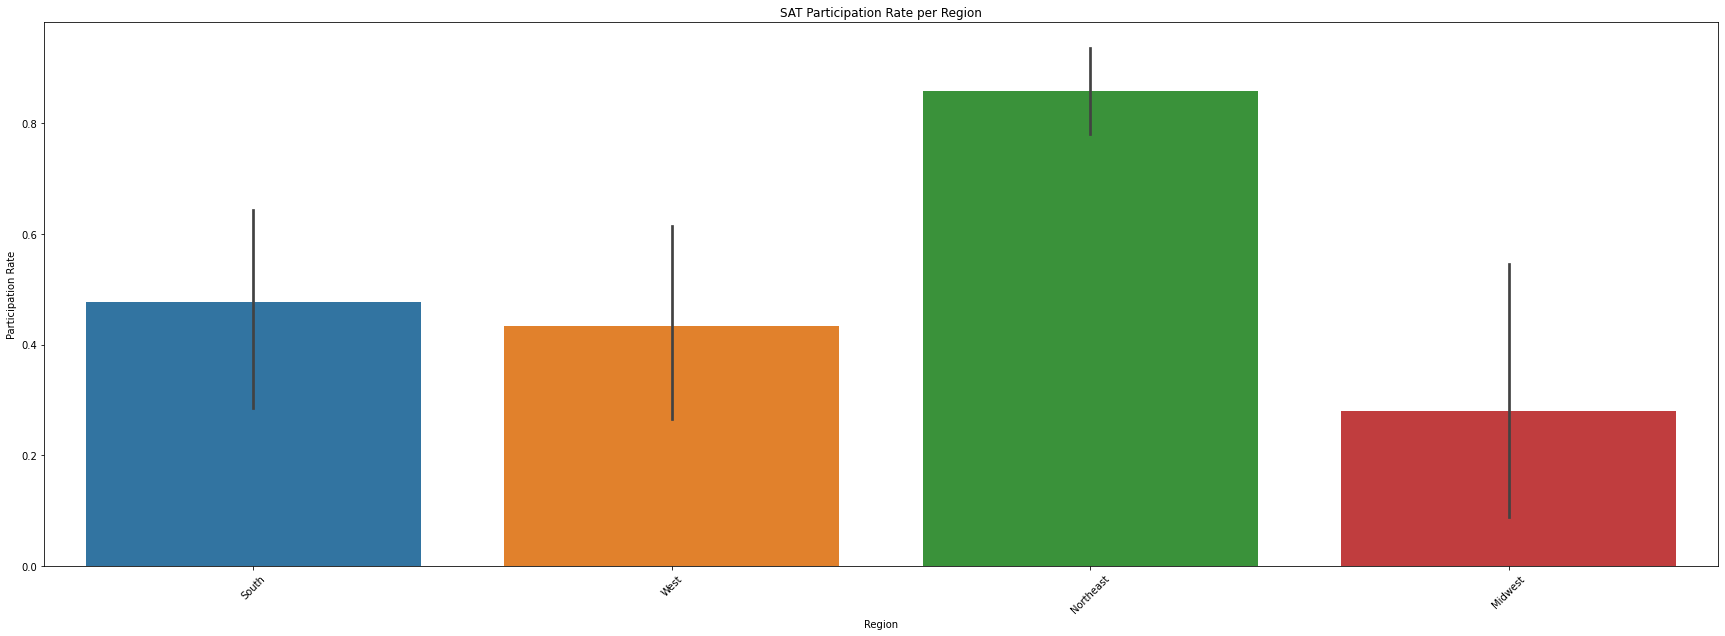

In [101]:
plt.figure(figsize=(30,10))
sns.barplot(x=sat_region['region'], y=sat_region['participation_sat'])
plt.xticks(rotation= 45)
plt.xlabel('Region')
plt.ylabel('Participation Rate')
plt.title('SAT Participation Rate per Region')

Text(0.5, 1.0, 'ACT Participation Rate per Region')

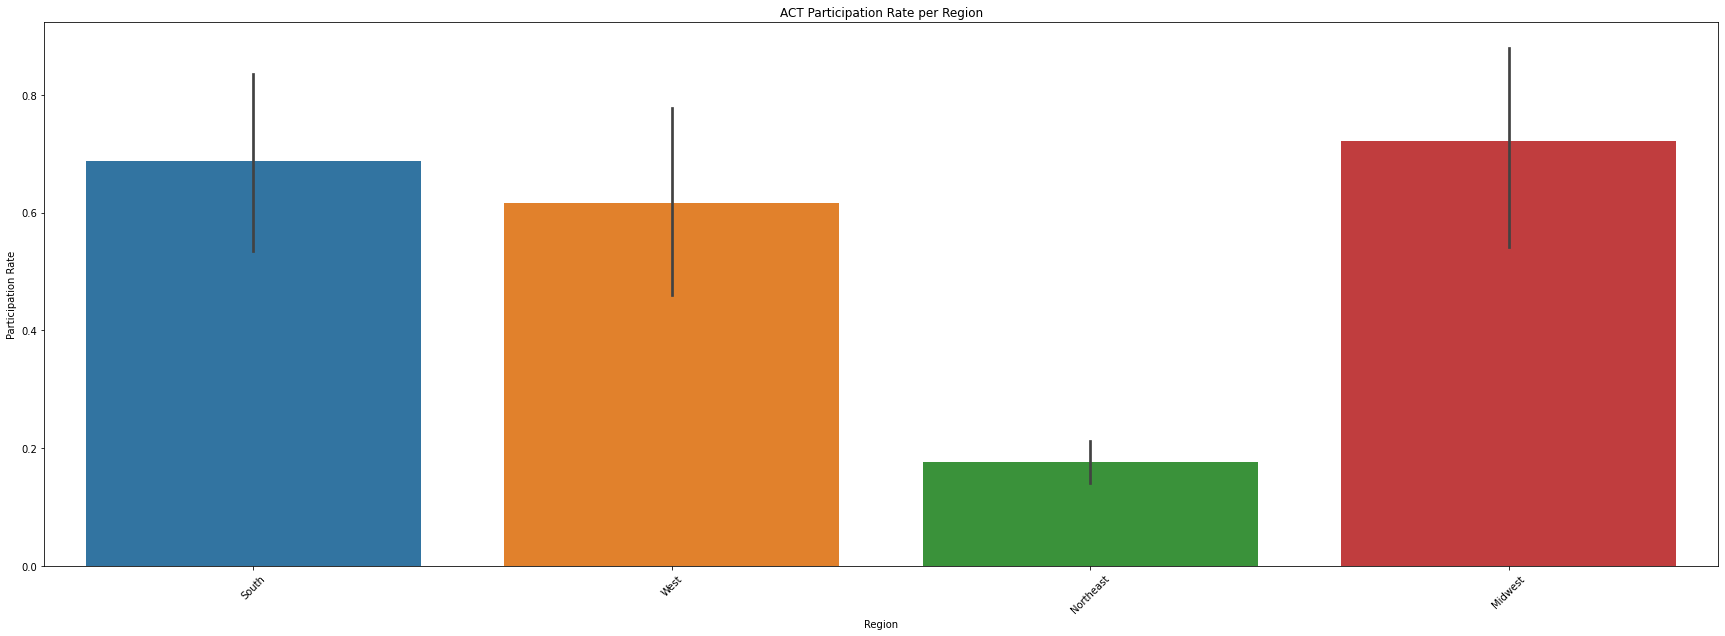

In [102]:
plt.figure(figsize=(30,10))
sns.barplot(x=act_region['region'], y=act_region['participation_act'])
plt.xticks(rotation= 45)
plt.xlabel('Region')
plt.ylabel('Participation Rate')
plt.title('ACT Participation Rate per Region')

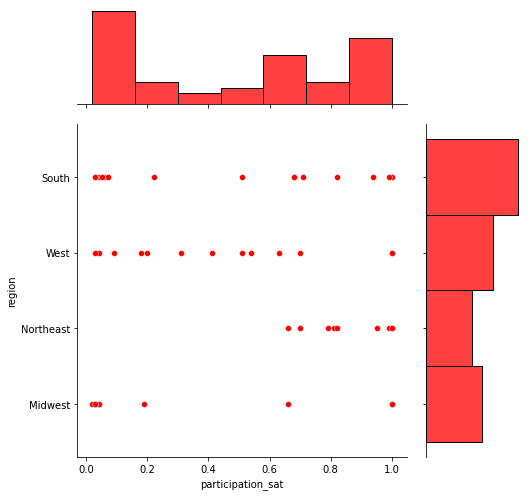

In [103]:
sns.jointplot(x="participation_sat", y="region", data=sat_region, height=7, ratio=3, color="r")

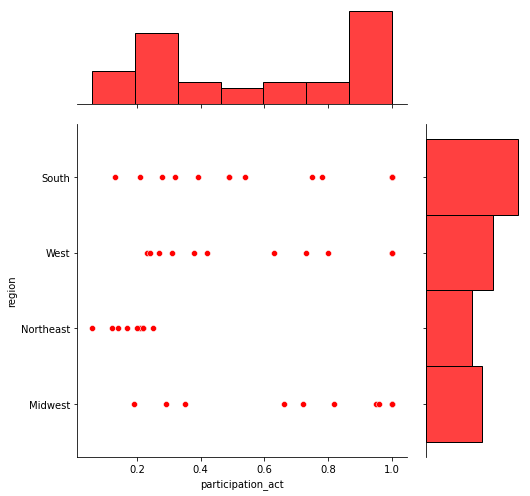

In [104]:
sns.jointplot(x="participation_act", y="region", data=act_region,height=7, ratio=3, color="r")

In [84]:
sat_act_2019.to_csv('sat_act_2019.csv', index=False)

In [85]:
sat_region.to_csv('sat_region.csv', index=False)

In [86]:
act_region.to_csv('act_region.csv', index=False)